In [ ]:
# dataset : https://www.kaggle.com/datasets/imbikramsaha/caltech-101
# model link : https://www.kaggle.com/datasets/keras/vgg16/

In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
dataset_dir = "C:\\Users\\kalya\\Downloads\\caltech-101-img\\caltech-101-img" #Specifies the directory path where the dataset is located
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)
#normalises the image

# # here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64), #resizes the image into 64 by 64 pixel
    batch_size=batch_size, #Sets the batch size for training.
    class_mode='categorical' # labels are one-hot encoded
)

Found 9144 images belonging to 102 classes.


In [35]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.applications import VGG16

In [4]:
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [5]:
for layer in base_model.layers:
   layer.trainable = False

In [6]:
x = Flatten()(base_model.output)
# Explanation: This line adds a Flatten layer to the output of the base_model. The Flatten layer is used to transform the 3D tensor output from the convolutional base (which is usually the output of the last convolutional layer) into a 1D tensor. This flattening step is necessary when transitioning from convolutional layers to densely connected layers.
# Example: Suppose the output shape of base_model is (7, 7, 512). This means you have a 3D tensor with dimensions 7x7x512. Applying the Flatten layer converts this 3D tensor into a 1D tensor by unraveling the values along the dimensions. In this case, the resulting 1D tensor would have a size of 7 * 7 * 512 = 25088.
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 36s 1s/step - loss: 3.9117 - accuracy: 0.2040 - val_loss: 3.4570 - val_accuracy: 0.2705
Epoch 2/10
32/32 [==============================] - 42s 1s/step - loss: 3.0323 - accuracy: 0.3465 - val_loss: 3.0193 - val_accuracy: 0.3710
Epoch 3/10
32/32 [==============================] - 45s 1s/step - loss: 2.5625 - accuracy: 0.4510 - val_loss: 2.6903 - val_accuracy: 0.4365
Epoch 4/10
32/32 [==============================] - 45s 1s/step - loss: 2.1750 - accuracy: 0.5235 - val_loss: 2.4510 - val_accuracy: 0.4695
Epoch 5/10
32/32 [==============================] - 45s 1s/step - loss: 1.8533 - accuracy: 0.6040 - val_loss: 2.2776 - val_accuracy: 0.4975
Epoch 6/10
32/32 [==============================] - 45s 1s/step - loss: 1.6174 - accuracy: 0.6480 - val_loss: 2.1455 - val_accuracy: 0.5155
Epoch 7/10
32/32 [==============================] - 46s 1s/step - loss: 1.4041 - accuracy: 0.6920 - val_loss: 2.0425 - val_accuracy: 0.5295
Epoch 8/10
32/32 [==

In [8]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
32/32 [==============================] - 49s 2s/step - loss: 3.1979 - accuracy: 0.3460 - val_loss: 2.3813 - val_accuracy: 0.4725
Epoch 2/20
32/32 [==============================] - 48s 2s/step - loss: 1.8469 - accuracy: 0.5655 - val_loss: 2.0121 - val_accuracy: 0.5375
Epoch 3/20
32/32 [==============================] - 48s 2s/step - loss: 1.2217 - accuracy: 0.6855 - val_loss: 1.7269 - val_accuracy: 0.5950
Epoch 4/20
32/32 [==============================] - 48s 2s/step - loss: 0.7763 - accuracy: 0.7955 - val_loss: 1.7604 - val_accuracy: 0.5915
Epoch 5/20
32/32 [==============================] - 2052s 66s/step - loss: 0.4890 - accuracy: 0.8690 - val_loss: 1.7755 - val_accuracy: 0.6110
Epoch 6/20
32/32 [==============================] - 35s 1s/step - loss: 0.3419 - accuracy: 0.9095 - val_loss: 1.7183 - val_accuracy: 0.6335
Epoch 7/20
32/32 [==============================] - 39s 1s/step - loss: 0.1842 - accuracy: 0.9515 - val_loss: 1.7142 - val_accuracy: 0.6360
Epoch 8/20
32/32 

In [9]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 [==============================] - 22s 354ms/step


In [14]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  Faces_easy
Actual:  Faces_easy


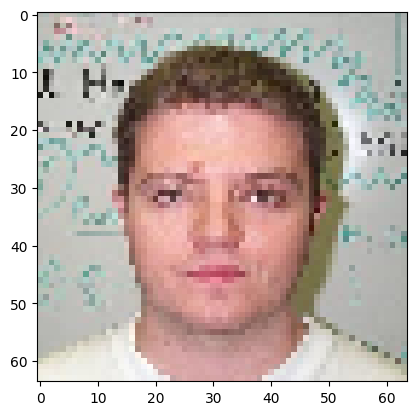

In [31]:
n = 887

plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])